In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/weight-height/weight-height.csv


### Python Modules

In [2]:
import matplotlib.pyplot as plt

### Importing the data

In [3]:
df=pd.read_csv('../input/weight-height/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Shape

In [4]:
df.shape

(10000, 3)

So we have the height and weight of 10000 individuals

### Getting data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


We have one object and two rows with float values in our dataset.

### Describing the data

In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


We can see that mean height is 169 cm and weight is 106 pounds 

### Getting count of Gender in the Data

In [7]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

So we have equal distribution of Male and Female in the datset

### Scatter Plot with Weight as a function of Height

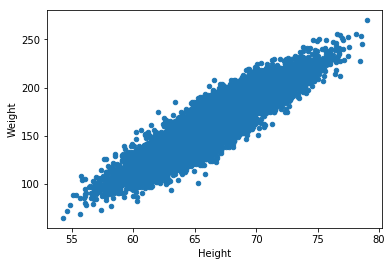

In [8]:
df.plot(kind='scatter',x='Height',y='Weight');

We can see that there is almost a Linear relation between Height and Weight.As Hieght increase weight increases.This is quite obvious as bone weight would be more in taller people.

### Male and Female Separation on Scatter Plot

In [9]:
males=df[df['Gender']=='Male']
females=df[df['Gender']=='Female']

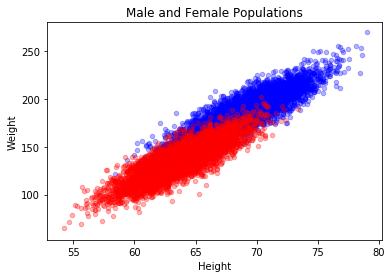

In [10]:
fig,ax = plt.subplots()
males.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='blue',alpha=0.3,
          title='Male and Female Populations')
females.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='red',alpha=0.3,
          title='Male and Female Populations');

So we can see that there is a clear seperation between Male and Female.Women generally have lower height than Men so their weighs alos proportionally lower.

In [11]:
df['Genddercolor'] = df['Gender'].map({'Male':'blue','Female':'red'})

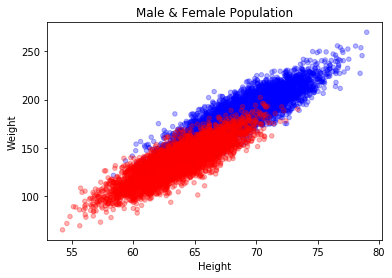

In [12]:
df.plot(kind='scatter',x='Height',y='Weight',c=df['Genddercolor'],alpha=0.3,title='Male & Female Population');

So we managed to plot the same graph with different technique using map command.

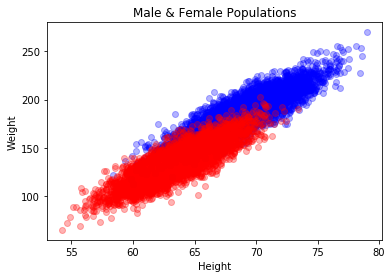

In [13]:
fig,ax = plt.subplots()
ax.plot(males['Height'],males['Weight'],'ob',females['Height'],females['Weight'],'or',alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male & Female Populations');

Here we used simple matplotlib techinique to plot he same graph.

### Histogram

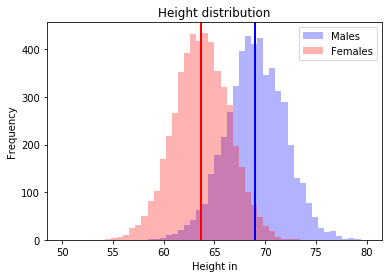

In [14]:
males['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='blue')
females['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='red')
plt.title('Height distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height in')
plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red',linewidth=2);

As expected men are taller than Females.The red and blue lines how the mean of Female and Male height.

### Cumulative Distribution

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


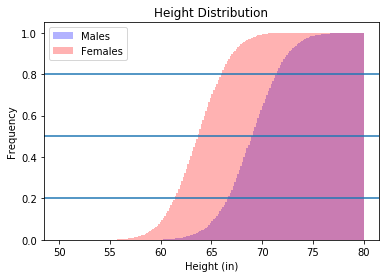

In [15]:
males['Height'].plot(kind='hist',bins=200,range=(50,80),alpha=0.3,color='blue',cumulative=True,normed=True)
females['Height'].plot(kind='hist',bins=200,range=(50,80),alpha=0.3,color='red',cumulative=True,normed=True)

plt.title('Height Distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height (in)')

plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2);

### Box plot

In [16]:
dfpvt=df.pivot(columns='Gender',values='Weight')
dfpvt.head(2)

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473


Text(0, 0.5, 'Weight (lb)')

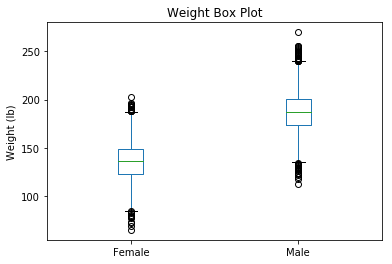

In [17]:
dfpvt.plot(kind='box');
plt.title('Weight Box Plot')
plt.ylabel('Weight (lb)')

So we can see the box plot shws the spread of weight for male and female.

### Weight Prediction

In [18]:
X=df['Height'].values[:,None]
X.shape

(10000, 1)

In [19]:
y=df.iloc[:,2].values
y.shape

(10000,)

### Splitting the test train data

In [20]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Weight

In [22]:
y_test=lm.predict(X_test)
print(y_test)

[179.25399046 180.34848321 161.62288801 ... 129.20288223 166.78470522
 101.81227499]


### Plotting the given data against the predicted data

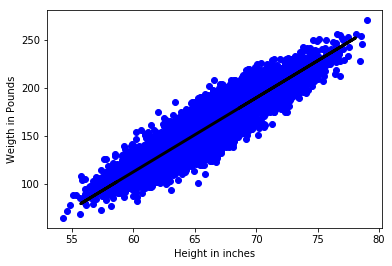

In [23]:
plt.scatter(X,y,color='b')
plt.plot(X_test,y_test,color='black',linewidth=3)
plt.xlabel('Height in inches')
plt.ylabel('Weigth in Pounds')
plt.show()

The blue dots are the actual weight and the black line indicates the linear model prediction.

### Model Performance

In [24]:
y_train_pred=lm.predict(X_train).ravel()
y_test_pred=lm.predict(X_test).ravel()

In [25]:
from sklearn.metrics import mean_squared_error as mse,r2_score

In [26]:
print("The Mean Squared Error on Train set is:\t{:0.1f}".format(mse(y_train,y_train_pred)))
print("The Mean Squared Error on Test set is:\t{:0.1f}".format(mse(y_test,y_test_pred)))

The Mean Squared Error on Train set is:	149.4
The Mean Squared Error on Test set is:	0.0


The mean squared error value for a good model should have low value.

In [27]:
print("The R2 score on the Train set is:\t{:0.1f}".format(r2_score(y_train,y_train_pred)))
print("The R2 score on the Test set is:\t{:0.1f}".format(r2_score(y_test,y_test_pred)))

The R2 score on the Train set is:	0.9
The R2 score on the Test set is:	1.0


The R2 Square error for a good model should be close to 1.